## DEMO: Black Body radiation

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
from scipy.constants import h, c, k, e, N_A

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Lets pick some beautiful colors
from matplotlib import cm
from cycler import cycler
magma = cm.get_cmap('magma', 10)  # 10 discrete colors, feel free to change
plt.rcParams['axes.prop_cycle'] = cycler(color=[magma(i) for i in range(magma.N)])

In [ ]:
def planck(wavelength, T):
    """
    Planck's Law to calculate the spectral radiance of black body radiation at temperature T.
    
    Parameters:
    - wavelength (float): Wavelength in meters.
    - T (float): Absolute temperature in Kelvin.
    
    Returns:
    - (float): Spectral radiance in W/(m^2*sr*m).
    """
   
    exponent = (h*c) / (wavelength*k*T)
    
    exponent = np.clip(exponent, None, 700)  # Clip values of exponent at 700 to avoid numerical overflow

    return (2.0*h*c**2) / (wavelength**5 * (np.exp(exponent) - 1))
    

def plot_black_body(T, show=False):
    """
    Plot the black body radiation spectrum for a given temperature T.
    """
    wavelengths = np.linspace(1e-9, 5e-6, 1000)  # Wavelength range from 1 nm to 3 um
    intensities = planck(wavelengths, T)
    
    plt.plot(wavelengths*1e9, intensities, label=f'T={T}', lw=3)  # Convert wavelength to nm for plotting
    
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('$Intensity (W/m^2)$')
    plt.grid(True)
    plt.legend()

    max_int = max(planck(wavelengths, 5000)) # lets limit y axis to 5000
    plt.ylim(0, max_int)

    if show: # show is needed for interactive plots
        plt.show() 

/var/folders/g4/3dkh7n1s0bjbl1tm3bgvvdsm0000gn/T/ipykernel_1512/2306792687.py:12: RuntimeWarning: overflow encountered in exp
  return (2.0*h*c**2) / (wavelength**5 * (np.exp((h*c)/(wavelength*k*T)) - 1))


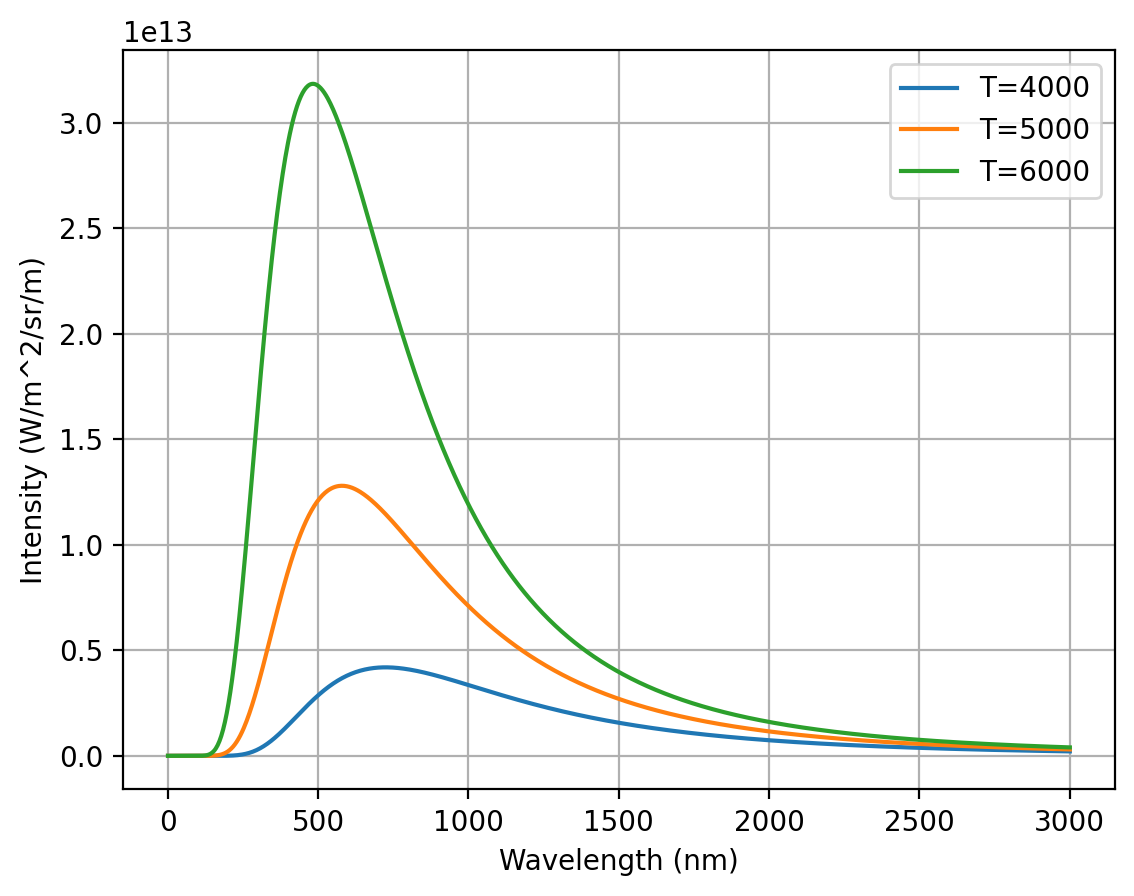

In [ ]:
for T in range(3000, 5000, 200):
    plot_black_body(T)

In [ ]:
interactive(plot_black_body, T=(1000, 5000, 100), show=True)